In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data science/z-prjct/05-NLP/review/reviews.csv")

In [4]:
df.head()

,Review,Sentiment
0,This product exceeded my expectations! It's hi...,Positive
1,"The product was decent. It worked fine, but it...",Neutral
2,I had a terrible experience with this company....,Negative
3,It's an okay product. Nothing to write home ab...,Neutral
4,Disappointed with the product. It didn't meet ...,Negative


In [5]:
df.tail()

,Review,Sentiment
381,I'm extremely dissatisfied with this product. ...,Negative
382,"The product was decent. It worked fine, but it...",Neutral
383,This product is outstanding! It's exactly what...,Positive
384,"The product was decent. It worked fine, but it...",Neutral
385,My experience was neither good nor bad. The pr...,Neutral


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     386 non-null    object
 1   Sentiment  386 non-null    object
dtypes: object(2)
memory usage: 6.2+ KB


In [7]:
df.shape

(386, 2)

In [8]:
df.isnull().sum()

,0
Review,0
Sentiment,0


In [9]:
df.duplicated().sum()

255

In [10]:
df.drop_duplicates(inplace=True)

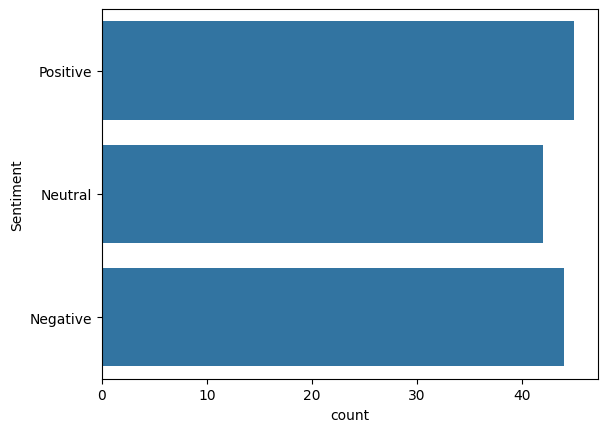

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df['Sentiment'])
plt.show()

# **NLP**

In [12]:
import nltk
from nltk.tokenize import word_tokenize , sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
text = df['Review']
text

,Review
0,This product exceeded my expectations! It's hi...
1,"The product was decent. It worked fine, but it..."
2,I had a terrible experience with this company....
3,It's an okay product. Nothing to write home ab...
4,Disappointed with the product. It didn't meet ...
...,...
356,The delivery was late and the packaging was da...
365,Avoid this company. Terrible customer service.
376,Neutral product. Didn't meet expectations.
380,Avoid this product. It's a complete waste of m...


In [14]:
# Removing special characters


text1 = []

In [15]:
import re

for i in text:
  text = re.sub('[^a-zA-Z\s]', '', i)
  text1.append(text)

In [16]:
text1

['This product exceeded my expectations Its highquality and performs exceptionally well',
 'The product was decent It worked fine but it wasnt anything special',
 'I had a terrible experience with this company The customer service was rude and unhelpful',
 'Its an okay product Nothing to write home about',
 'Disappointed with the product It didnt meet my expectations',
 'Avoid this company at all costs The service is terrible and the products are subpar',
 'This product is outstanding Its exactly what I was looking for and works perfectly',
 'Absolutely horrendous service Never again',
 'This experience was okay Nothing special',
 'Topquality product Very satisfied with my purchase',
 'Im extremely dissatisfied with this product Its cheaply made and doesnt function properly',
 'The service was satisfactory Nothing outstanding but nothing terrible either',
 'The product was decent but it didnt meet all of my expectations',
 'I would not recommend this product Its overpriced and doesnt w

In [17]:
# Tokenizing

text = pd.Series(text1)

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
import nltk

nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [20]:
# Apply word tokenization and filtering to  text data
text = text.apply(lambda x: ' '.join([w for w in word_tokenize(x) if len(w) >= 3]))

In [21]:
text

,0
0,This product exceeded expectations Its highqua...
1,The product was decent worked fine but wasnt a...
2,had terrible experience with this company The ...
3,Its okay product Nothing write home about
4,Disappointed with the product didnt meet expec...
...,...
126,The delivery was late and the packaging was da...
127,Avoid this company Terrible customer service
128,Neutral product Didnt meet expectations
129,Avoid this product Its complete waste money


In [22]:
# Normalising and converting to smaller


from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
text = text.apply(lambda x :[stemmer.stem(i.lower())for i in word_tokenize(x)]).apply(lambda x:' '.join(x))

In [23]:
text

,0
0,this product exceed expect it highqual and per...
1,the product was decent work fine but wasnt any...
2,had terribl experi with this compani the custo...
3,it okay product noth write home about
4,disappoint with the product didnt meet expect
...,...
126,the deliveri was late and the packag was damag
127,avoid this compani terribl custom servic
128,neutral product didnt meet expect
129,avoid this product it complet wast money


In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
# stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')
text = text.apply(lambda x : [ i for i in word_tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))

In [26]:
# vectorizing


from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
vectorizer = vec.fit(text)
train_data_vec = vec.fit_transform(text)

In [27]:
print(train_data_vec)

  (0, 103)	0.1550540416891291
  (0, 47)	0.33751564536163736
  (0, 50)	0.27927343825699114
  (0, 64)	0.4752551650331041
  (0, 98)	0.4752551650331041
  (0, 49)	0.3746470917579861
  (0, 139)	0.4381237186367555
  (1, 103)	0.16173766633272801
  (1, 31)	0.3633155104842932
  (1, 142)	0.3633155104842932
  (1, 56)	0.45700909853995547
  (1, 137)	0.4295283056246425
  (1, 5)	0.4295283056246425
  (1, 121)	0.3633155104842932
  (2, 128)	0.3412279069917894
  (2, 51)	0.2838212736091586
  (2, 23)	0.36400845008912097
  (2, 29)	0.32237386075452484
  (2, 119)	0.21843470168002108
  (2, 116)	0.49332112145912754
  (2, 132)	0.5248833151540301
  (3, 103)	0.18831687703350342
  (3, 91)	0.4099208997846279
  (3, 90)	0.3607789438840255
  (3, 146)	0.5772088718107322
  :	:
  (126, 30)	0.4893100621752305
  (126, 95)	0.530779605073722
  (127, 128)	0.4745625876343129
  (127, 23)	0.5062446196676565
  (127, 29)	0.44834132968207707
  (127, 119)	0.30378798197444706
  (127, 10)	0.4745625876343129
  (128, 103)	0.21388741349988

In [28]:
y = df['Sentiment']

In [29]:
y

,Sentiment
0,Positive
1,Neutral
2,Negative
3,Neutral
4,Negative
...,...
356,Negative
365,Negative
376,Neutral
380,Negative


In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(train_data_vec,y,test_size=0.2,random_state=0)

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [32]:
ypred = model.predict(xtest)

In [33]:
ypred

array(['Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Neutral',
       'Negative', 'Positive', 'Negative', 'Negative', 'Positive',
       'Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Neutral', 'Negative', 'Neutral', 'Neutral', 'Positive',
       'Positive'], dtype=object)

In [34]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest,ypred)

In [35]:
accuracy

1.0

In [36]:
x_test_pred = model.predict(xtest)
test_data_accuracy = accuracy_score(x_test_pred, ytest)

In [37]:
test_data_accuracy

1.0

**PREDICTIONS**

In [38]:
new_data1 = 'This product exceeded my expectations! It is high-quality and performs exceptionally well'

In [39]:
model.predict(vec.transform(np.array([new_data1])))


array(['Positive'], dtype=object)

In [40]:
new_data2 = 'Ordered folding table. Never received any. No phone number for contact. Email they won’t answer. Don’t get trapped in the advertise. Don’t buy anything'

In [41]:
model.predict(vec.transform(np.array([new_data2])))

array(['Negative'], dtype=object)

In [42]:
new_data3= 'The product was decent It worked fine but it wasnt anything special'
model.predict(vec.transform(np.array([new_data3])))

array(['Neutral'], dtype=object)

**Model Save**

In [45]:
import pickle
pickle.dump(model,open('model_nlp.sav','wb'))

In [46]:
pickle.dump(vec, open('vectorizer_nlp.pkl', 'wb'))
